In [1]:
pwd

'c:\\Users\\Admin\\Documents\\LightningHydraTEst\\lightning-hydra-template\\notebooks'

In [2]:
cd ../

c:\Users\Admin\Documents\LightningHydraTEst\lightning-hydra-template


In [3]:
import torch
from src.models.components.filter_resnet import FilterResnet
from collections import OrderedDict
import torchvision.transforms as T
from PIL import Image, ImageDraw, ImageOps
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import albumentations
import cv2
import face_recognition as fc
import albumentations.pytorch
import torch_directml

In [4]:
ckpt_file = torch.load('.\outputs\weight_resnet50.pt', map_location=torch.device('cpu'))
print(ckpt_file)

{'pytorch-lightning_version': '1.9.1', 'state_dict': OrderedDict([('net.model.conv1.weight', tensor([[[[-1.2839e-02, -9.5465e-03,  3.0479e-02,  ...,  4.5451e-02,
           -2.0939e-02,  1.1686e-02],
          [-6.1463e-02,  3.9837e-02,  7.2132e-02,  ...,  8.6506e-02,
            3.1711e-02, -5.3145e-02],
          [ 6.3612e-02, -2.7695e-01,  3.9884e-01,  ..., -1.6704e-01,
            2.2044e-01, -6.7586e-02],
          ...,
          [-1.0951e-01,  3.8017e-01, -4.5620e-01,  ...,  6.9332e-01,
           -5.7133e-01,  2.3319e-01],
          [ 2.9804e-02, -1.7453e-01,  6.4528e-01,  ...,  5.3581e-01,
           -4.1041e-02, -6.0271e-02],
          [ 5.8367e-02, -1.2274e-01,  2.6541e-02,  ..., -3.4812e-01,
            1.9881e-01, -1.1469e-02]],

         [[ 1.6377e-02,  5.0543e-03, -1.6261e-02,  ...,  8.9525e-02,
           -6.0377e-02,  2.7607e-02],
          [-3.2895e-02,  3.9980e-02,  8.6124e-02,  ...,  1.2083e-01,
            2.8723e-02, -3.4328e-02],
          [ 5.4978e-02, -2.6926e-0

In [6]:
print(ckpt_file.keys())

dict_keys(['pytorch-lightning_version', 'state_dict'])


In [ ]:
torch.save({
    'pytorch-lightning_version': ckpt_file['pytorch-lightning_version'],
    'state_dict': model_state_dict2
}, './outputs/weight_resnet50.pt')

In [7]:
model_state_dict = ckpt_file['state_dict']

In [8]:
print(model_state_dict)
print(list(model_state_dict.keys()))
print(len(list(model_state_dict.keys())))

OrderedDict([('net.model.conv1.weight', tensor([[[[-1.2839e-02, -9.5465e-03,  3.0479e-02,  ...,  4.5451e-02,
           -2.0939e-02,  1.1686e-02],
          [-6.1463e-02,  3.9837e-02,  7.2132e-02,  ...,  8.6506e-02,
            3.1711e-02, -5.3145e-02],
          [ 6.3612e-02, -2.7695e-01,  3.9884e-01,  ..., -1.6704e-01,
            2.2044e-01, -6.7586e-02],
          ...,
          [-1.0951e-01,  3.8017e-01, -4.5620e-01,  ...,  6.9332e-01,
           -5.7133e-01,  2.3319e-01],
          [ 2.9804e-02, -1.7453e-01,  6.4528e-01,  ...,  5.3581e-01,
           -4.1041e-02, -6.0271e-02],
          [ 5.8367e-02, -1.2274e-01,  2.6541e-02,  ..., -3.4812e-01,
            1.9881e-01, -1.1469e-02]],

         [[ 1.6377e-02,  5.0543e-03, -1.6261e-02,  ...,  8.9525e-02,
           -6.0377e-02,  2.7607e-02],
          [-3.2895e-02,  3.9980e-02,  8.6124e-02,  ...,  1.2083e-01,
            2.8723e-02, -3.4328e-02],
          [ 5.4978e-02, -2.6926e-01,  4.2593e-01,  ..., -2.3436e-01,
            3.2609

In [9]:
print(model_state_dict['net.model.conv1.weight'])
print(model_state_dict['net.model.conv1.weight'].shape)

tensor([[[[-1.2839e-02, -9.5465e-03,  3.0479e-02,  ...,  4.5451e-02,
           -2.0939e-02,  1.1686e-02],
          [-6.1463e-02,  3.9837e-02,  7.2132e-02,  ...,  8.6506e-02,
            3.1711e-02, -5.3145e-02],
          [ 6.3612e-02, -2.7695e-01,  3.9884e-01,  ..., -1.6704e-01,
            2.2044e-01, -6.7586e-02],
          ...,
          [-1.0951e-01,  3.8017e-01, -4.5620e-01,  ...,  6.9332e-01,
           -5.7133e-01,  2.3319e-01],
          [ 2.9804e-02, -1.7453e-01,  6.4528e-01,  ...,  5.3581e-01,
           -4.1041e-02, -6.0271e-02],
          [ 5.8367e-02, -1.2274e-01,  2.6541e-02,  ..., -3.4812e-01,
            1.9881e-01, -1.1469e-02]],

         [[ 1.6377e-02,  5.0543e-03, -1.6261e-02,  ...,  8.9525e-02,
           -6.0377e-02,  2.7607e-02],
          [-3.2895e-02,  3.9980e-02,  8.6124e-02,  ...,  1.2083e-01,
            2.8723e-02, -3.4328e-02],
          [ 5.4978e-02, -2.6926e-01,  4.2593e-01,  ..., -2.3436e-01,
            3.2609e-01, -1.0966e-01],
          ...,
     

In [10]:
model = FilterResnet(model_name='resnet50')
print(model.model.conv1.weight)

Parameter containing:
tensor([[[[-7.4457e-03, -3.1783e-03,  3.7353e-02,  ...,  4.7936e-02,
           -2.0325e-02,  8.8140e-03],
          [-5.7435e-02,  4.4709e-02,  7.7509e-02,  ...,  8.8442e-02,
            2.9346e-02, -5.8331e-02],
          [ 6.8356e-02, -2.7044e-01,  4.0348e-01,  ..., -1.6491e-01,
            2.1868e-01, -7.2909e-02],
          ...,
          [-1.0874e-01,  3.8148e-01, -4.5487e-01,  ...,  6.8366e-01,
           -5.7855e-01,  2.2461e-01],
          [ 2.5698e-02, -1.7703e-01,  6.4375e-01,  ...,  5.2644e-01,
           -4.9317e-02, -6.8082e-02],
          [ 4.5281e-02, -1.3072e-01,  1.7864e-02,  ..., -3.5753e-01,
            1.8976e-01, -2.2302e-02]],

         [[ 8.9197e-03,  4.8768e-03, -1.5356e-02,  ...,  8.6949e-02,
           -6.5541e-02,  1.6895e-02],
          [-3.3543e-02,  3.9067e-02,  8.6565e-02,  ...,  1.1713e-01,
            2.1848e-02, -4.4082e-02],
          [ 5.5285e-02, -2.6424e-01,  4.2687e-01,  ..., -2.3723e-01,
            3.2017e-01, -1.1832e-01]

In [11]:
print(model.state_dict().keys())

odict_keys(['model.conv1.weight', 'model.bn1.weight', 'model.bn1.bias', 'model.bn1.running_mean', 'model.bn1.running_var', 'model.bn1.num_batches_tracked', 'model.layer1.0.conv1.weight', 'model.layer1.0.bn1.weight', 'model.layer1.0.bn1.bias', 'model.layer1.0.bn1.running_mean', 'model.layer1.0.bn1.running_var', 'model.layer1.0.bn1.num_batches_tracked', 'model.layer1.0.conv2.weight', 'model.layer1.0.bn2.weight', 'model.layer1.0.bn2.bias', 'model.layer1.0.bn2.running_mean', 'model.layer1.0.bn2.running_var', 'model.layer1.0.bn2.num_batches_tracked', 'model.layer1.0.conv3.weight', 'model.layer1.0.bn3.weight', 'model.layer1.0.bn3.bias', 'model.layer1.0.bn3.running_mean', 'model.layer1.0.bn3.running_var', 'model.layer1.0.bn3.num_batches_tracked', 'model.layer1.0.downsample.0.weight', 'model.layer1.0.downsample.1.weight', 'model.layer1.0.downsample.1.bias', 'model.layer1.0.downsample.1.running_mean', 'model.layer1.0.downsample.1.running_var', 'model.layer1.0.downsample.1.num_batches_tracked', 

In [12]:
model_state_dict2 = OrderedDict([(key[10:], value) for key, value in model_state_dict.items()])
print(model_state_dict2)


OrderedDict([('conv1.weight', tensor([[[[-1.2839e-02, -9.5465e-03,  3.0479e-02,  ...,  4.5451e-02,
           -2.0939e-02,  1.1686e-02],
          [-6.1463e-02,  3.9837e-02,  7.2132e-02,  ...,  8.6506e-02,
            3.1711e-02, -5.3145e-02],
          [ 6.3612e-02, -2.7695e-01,  3.9884e-01,  ..., -1.6704e-01,
            2.2044e-01, -6.7586e-02],
          ...,
          [-1.0951e-01,  3.8017e-01, -4.5620e-01,  ...,  6.9332e-01,
           -5.7133e-01,  2.3319e-01],
          [ 2.9804e-02, -1.7453e-01,  6.4528e-01,  ...,  5.3581e-01,
           -4.1041e-02, -6.0271e-02],
          [ 5.8367e-02, -1.2274e-01,  2.6541e-02,  ..., -3.4812e-01,
            1.9881e-01, -1.1469e-02]],

         [[ 1.6377e-02,  5.0543e-03, -1.6261e-02,  ...,  8.9525e-02,
           -6.0377e-02,  2.7607e-02],
          [-3.2895e-02,  3.9980e-02,  8.6124e-02,  ...,  1.2083e-01,
            2.8723e-02, -3.4328e-02],
          [ 5.4978e-02, -2.6926e-01,  4.2593e-01,  ..., -2.3436e-01,
            3.2609e-01, -1.0

In [13]:
print(model_state_dict.keys())

odict_keys(['net.model.conv1.weight', 'net.model.bn1.weight', 'net.model.bn1.bias', 'net.model.bn1.running_mean', 'net.model.bn1.running_var', 'net.model.bn1.num_batches_tracked', 'net.model.layer1.0.conv1.weight', 'net.model.layer1.0.bn1.weight', 'net.model.layer1.0.bn1.bias', 'net.model.layer1.0.bn1.running_mean', 'net.model.layer1.0.bn1.running_var', 'net.model.layer1.0.bn1.num_batches_tracked', 'net.model.layer1.0.conv2.weight', 'net.model.layer1.0.bn2.weight', 'net.model.layer1.0.bn2.bias', 'net.model.layer1.0.bn2.running_mean', 'net.model.layer1.0.bn2.running_var', 'net.model.layer1.0.bn2.num_batches_tracked', 'net.model.layer1.0.conv3.weight', 'net.model.layer1.0.bn3.weight', 'net.model.layer1.0.bn3.bias', 'net.model.layer1.0.bn3.running_mean', 'net.model.layer1.0.bn3.running_var', 'net.model.layer1.0.bn3.num_batches_tracked', 'net.model.layer1.0.downsample.0.weight', 'net.model.layer1.0.downsample.1.weight', 'net.model.layer1.0.downsample.1.bias', 'net.model.layer1.0.downsample

In [14]:
print(model_state_dict2.keys())
print(model.model.state_dict().keys())

odict_keys(['conv1.weight', 'bn1.weight', 'bn1.bias', 'bn1.running_mean', 'bn1.running_var', 'bn1.num_batches_tracked', 'layer1.0.conv1.weight', 'layer1.0.bn1.weight', 'layer1.0.bn1.bias', 'layer1.0.bn1.running_mean', 'layer1.0.bn1.running_var', 'layer1.0.bn1.num_batches_tracked', 'layer1.0.conv2.weight', 'layer1.0.bn2.weight', 'layer1.0.bn2.bias', 'layer1.0.bn2.running_mean', 'layer1.0.bn2.running_var', 'layer1.0.bn2.num_batches_tracked', 'layer1.0.conv3.weight', 'layer1.0.bn3.weight', 'layer1.0.bn3.bias', 'layer1.0.bn3.running_mean', 'layer1.0.bn3.running_var', 'layer1.0.bn3.num_batches_tracked', 'layer1.0.downsample.0.weight', 'layer1.0.downsample.1.weight', 'layer1.0.downsample.1.bias', 'layer1.0.downsample.1.running_mean', 'layer1.0.downsample.1.running_var', 'layer1.0.downsample.1.num_batches_tracked', 'layer1.1.conv1.weight', 'layer1.1.bn1.weight', 'layer1.1.bn1.bias', 'layer1.1.bn1.running_mean', 'layer1.1.bn1.running_var', 'layer1.1.bn1.num_batches_tracked', 'layer1.1.conv2.we

In [15]:
print(len(model_state_dict2.keys()))
print(len(model.model.state_dict().keys()))

320
320


In [16]:
def load_my_state_dict(model: torch.nn.Module, state_dict: OrderedDict):    
    own_state = model.model.state_dict()
    for name, param in state_dict.items():
        if name not in own_state:
            continue
        else:
            if param.shape == own_state[name].shape:
                own_state[name].copy_(param)
            else:
                print(name, param.shape, own_state[name].shape)

In [17]:
load_my_state_dict(model, model_state_dict2)
print(model.model.conv1.weight)

Parameter containing:
tensor([[[[-1.2839e-02, -9.5465e-03,  3.0479e-02,  ...,  4.5451e-02,
           -2.0939e-02,  1.1686e-02],
          [-6.1463e-02,  3.9837e-02,  7.2132e-02,  ...,  8.6506e-02,
            3.1711e-02, -5.3145e-02],
          [ 6.3612e-02, -2.7695e-01,  3.9884e-01,  ..., -1.6704e-01,
            2.2044e-01, -6.7586e-02],
          ...,
          [-1.0951e-01,  3.8017e-01, -4.5620e-01,  ...,  6.9332e-01,
           -5.7133e-01,  2.3319e-01],
          [ 2.9804e-02, -1.7453e-01,  6.4528e-01,  ...,  5.3581e-01,
           -4.1041e-02, -6.0271e-02],
          [ 5.8367e-02, -1.2274e-01,  2.6541e-02,  ..., -3.4812e-01,
            1.9881e-01, -1.1469e-02]],

         [[ 1.6377e-02,  5.0543e-03, -1.6261e-02,  ...,  8.9525e-02,
           -6.0377e-02,  2.7607e-02],
          [-3.2895e-02,  3.9980e-02,  8.6124e-02,  ...,  1.2083e-01,
            2.8723e-02, -3.4328e-02],
          [ 5.4978e-02, -2.6926e-01,  4.2593e-01,  ..., -2.3436e-01,
            3.2609e-01, -1.0966e-01]

In [18]:
print(model)

FilterResnet(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
       

In [169]:
name_layers = []
for name, module in model.model.named_modules():
    name_layers.append(name)
print(name_layers)
print(len(name_layers))

['', 'conv1', 'bn1', 'relu', 'maxpool', 'layer1', 'layer1.0', 'layer1.0.conv1', 'layer1.0.bn1', 'layer1.0.conv2', 'layer1.0.bn2', 'layer1.0.conv3', 'layer1.0.bn3', 'layer1.0.relu', 'layer1.0.downsample', 'layer1.0.downsample.0', 'layer1.0.downsample.1', 'layer1.1', 'layer1.1.conv1', 'layer1.1.bn1', 'layer1.1.conv2', 'layer1.1.bn2', 'layer1.1.conv3', 'layer1.1.bn3', 'layer1.1.relu', 'layer1.2', 'layer1.2.conv1', 'layer1.2.bn1', 'layer1.2.conv2', 'layer1.2.bn2', 'layer1.2.conv3', 'layer1.2.bn3', 'layer1.2.relu', 'layer2', 'layer2.0', 'layer2.0.conv1', 'layer2.0.bn1', 'layer2.0.conv2', 'layer2.0.bn2', 'layer2.0.conv3', 'layer2.0.bn3', 'layer2.0.relu', 'layer2.0.downsample', 'layer2.0.downsample.0', 'layer2.0.downsample.1', 'layer2.1', 'layer2.1.conv1', 'layer2.1.bn1', 'layer2.1.conv2', 'layer2.1.bn2', 'layer2.1.conv3', 'layer2.1.bn3', 'layer2.1.relu', 'layer2.2', 'layer2.2.conv1', 'layer2.2.bn1', 'layer2.2.conv2', 'layer2.2.bn2', 'layer2.2.conv3', 'layer2.2.bn3', 'layer2.2.relu', 'layer2.

In [19]:
class MyTransform():
  def __init__(
    self,
    transform = None,
    height = 224,
    width = 224,
    mean = (0.485, 0.456, 0.406),
    std = (0.229, 0.224, 0.225)
  ):
    if transform is not None:
      self.transform = transform
    else:
      self.transform = albumentations.Compose([
          albumentations.Resize(height = height, width = width),
          albumentations.Normalize(mean = mean, std = std),
          albumentations.pytorch.ToTensorV2()
      ])
  def __call__(self, image):
    return self.transform(image = image)['image']

In [20]:
def draw_image_with_keypoints(
    image: torch.Tensor,
    keypoints: torch.Tensor,
    width: float = None,
    height: float = None,
    normalize: bool = False
) -> None:
    assert width is not None and height is not None
    if normalize:
        width_height = torch.Tensor([width, height])
        if torch.cuda.is_available():
            width_height = width_height.cuda()
        keypoints = (keypoints + 0.5) * width_height
    if not isinstance(image, Image.Image):
        image = Image.fromarray(image)
    draw = ImageDraw.Draw(image)
    for i in range(keypoints.shape[0]):
        if keypoints[i][0] is not None and keypoints[i][1] is not None: # and keypoints[i][0] >= 0 and keypoints[i][0] <= width and keypoints[i][1] >= 0 and keypoints[i][1] <= height:
            draw.ellipse((keypoints[i][0] - 2, keypoints[i][1] - 2, keypoints[i][0] + 2, keypoints[i][1] + 2), fill = (255, 255, 0))
    return image

In [21]:
def denormalize(image: torch.Tensor, mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225]):
    # 3, H, W
    for t, m, s in zip(image, mean, std):
        t.mul_(s).add_(m)
    print(image)
    return torch.clamp(image, 0, 1)

In [22]:
image_transform = MyTransform()

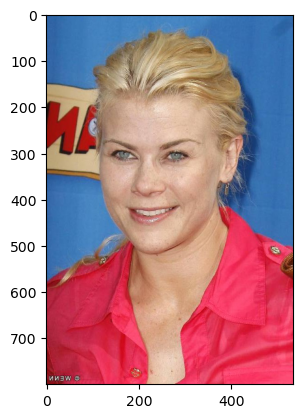

In [27]:
image = Image.open('.\data\ibug_300W_large_face_landmark_dataset\lfpw\\testset\image_0001_mirror.jpg')
plt.imshow(image)

In [28]:
image_transformed = image_transform(np.array(image))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 224, 224])


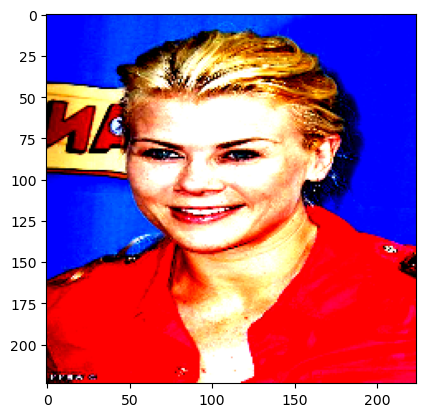

In [29]:
print(image_transformed.shape)
plt.imshow(image_transformed.permute(1, 2, 0))

In [30]:
dummy = image_transformed[None, :, :, :]
print(dummy.shape)

torch.Size([1, 3, 224, 224])


tensor([[[0.2000, 0.2000, 0.1922,  ..., 0.2078, 0.2039, 0.2078],
         [0.1922, 0.1961, 0.1922,  ..., 0.1922, 0.1882, 0.1922],
         [0.1843, 0.1922, 0.1843,  ..., 0.1922, 0.1882, 0.1961],
         ...,
         [0.5490, 0.5059, 0.4824,  ..., 0.9961, 1.0000, 1.0000],
         [0.5373, 0.4902, 0.4980,  ..., 1.0000, 0.9922, 0.9922],
         [0.4549, 0.4706, 0.5255,  ..., 1.0000, 0.9765, 0.9882]],

        [[0.3922, 0.3922, 0.3922,  ..., 0.4588, 0.4667, 0.4745],
         [0.3922, 0.3961, 0.3922,  ..., 0.4314, 0.4392, 0.4431],
         [0.3961, 0.3961, 0.3843,  ..., 0.4157, 0.4078, 0.4196],
         ...,
         [0.0667, 0.0627, 0.0980,  ..., 0.3059, 0.3059, 0.3059],
         [0.0824, 0.0745, 0.0706,  ..., 0.3176, 0.3059, 0.3059],
         [0.0431, 0.0824, 0.0706,  ..., 0.3255, 0.3098, 0.3216]],

        [[0.6510, 0.6510, 0.6471,  ..., 0.7216, 0.7255, 0.7294],
         [0.6471, 0.6510, 0.6471,  ..., 0.6941, 0.6902, 0.6941],
         [0.6471, 0.6510, 0.6392,  ..., 0.6745, 0.6627, 0.

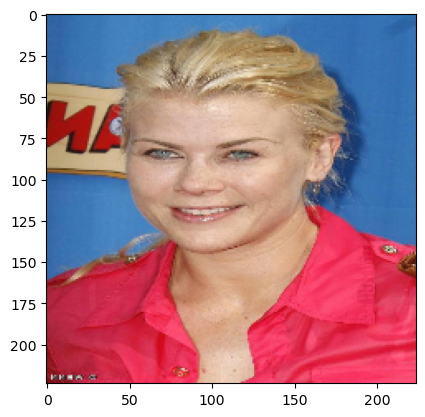

In [31]:
image_denormalize = denormalize(image = torch.clone(image_transformed))
plt.imshow(image_denormalize.permute(1, 2, 0))

In [32]:
keypoint = model(dummy)
keypoint = torch.squeeze(keypoint)
print(keypoint.shape)

torch.Size([68, 2])


In [33]:
print(keypoint)

tensor([[-3.2983e-01, -4.5752e-02],
        [-3.3413e-01,  5.4142e-02],
        [-3.4293e-01,  1.5042e-01],
        [-3.2607e-01,  2.6580e-01],
        [-2.9190e-01,  3.7538e-01],
        [-2.3759e-01,  4.5936e-01],
        [-1.5893e-01,  5.1002e-01],
        [-6.1661e-02,  5.4849e-01],
        [ 5.8078e-02,  5.6050e-01],
        [ 1.6613e-01,  5.3510e-01],
        [ 2.4652e-01,  4.5898e-01],
        [ 3.1169e-01,  3.9111e-01],
        [ 3.3874e-01,  3.0249e-01],
        [ 3.4417e-01,  2.0334e-01],
        [ 3.4967e-01,  1.0005e-01],
        [ 3.4183e-01,  1.0675e-02],
        [ 3.2269e-01, -6.8335e-02],
        [-2.8480e-01, -1.8389e-01],
        [-2.4617e-01, -2.2296e-01],
        [-1.8756e-01, -2.2715e-01],
        [-1.3280e-01, -2.0706e-01],
        [-7.7619e-02, -2.0963e-01],
        [ 4.8085e-02, -1.8472e-01],
        [ 1.1048e-01, -1.9722e-01],
        [ 1.6451e-01, -2.0416e-01],
        [ 2.1893e-01, -1.9782e-01],
        [ 2.4501e-01, -1.5239e-01],
        [ 3.8105e-03, -9.433

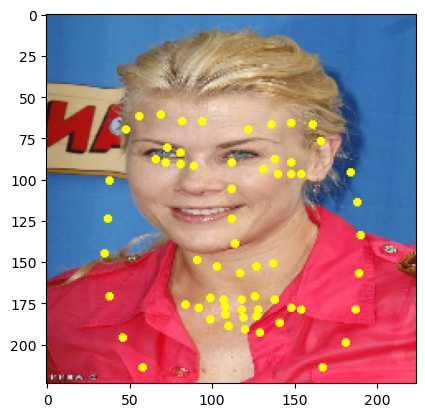

In [34]:
image_with_keypoints = draw_image_with_keypoints(
    image = T.ToPILImage()((image_denormalize * 255).type(torch.uint8)),
    keypoints = keypoint,
    width = image_denormalize.shape[2],
    height = image_denormalize.shape[1],
    normalize = True
)
plt.imshow(image_with_keypoints)

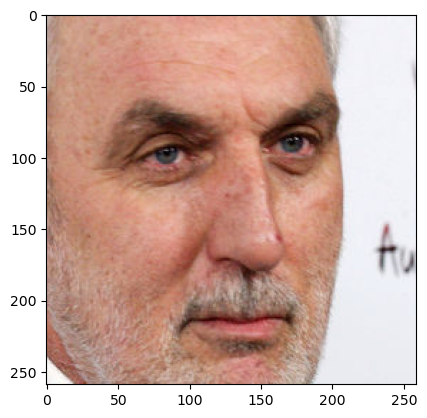

In [23]:
image2 = Image.open('.\outputs\\2023-04-07\\00-23-31\crop_image.png')
plt.imshow(image2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[0.7294, 0.7647, 0.7804,  ..., 0.9569, 0.9569, 0.9569],
         [0.7490, 0.7804, 0.7804,  ..., 0.9569, 0.9569, 0.9569],
         [0.7608, 0.7686, 0.7529,  ..., 0.9569, 0.9569, 0.9569],
         ...,
         [0.9529, 0.9529, 0.9569,  ..., 0.9216, 0.9216, 0.9216],
         [0.9490, 0.9569, 0.9608,  ..., 0.9216, 0.9216, 0.9216],
         [0.9451, 0.9569, 0.9608,  ..., 0.9216, 0.9216, 0.9216]],

        [[0.6549, 0.6824, 0.6824,  ..., 0.9529, 0.9529, 0.9529],
         [0.6941, 0.7020, 0.6824,  ..., 0.9529, 0.9529, 0.9529],
         [0.7137, 0.6941, 0.6627,  ..., 0.9529, 0.9529, 0.9529],
         ...,
         [0.9412, 0.9451, 0.9529,  ..., 0.9255, 0.9255, 0.9255],
         [0.9333, 0.9412, 0.9529,  ..., 0.9255, 0.9255, 0.9255],
         [0.9294, 0.9412, 0.9529,  ..., 0.9255, 0.9255, 0.9255]],

        [[0.6275, 0.6549, 0.6510,  ..., 0.9765, 0.9765, 0.9765],
         [0.6588, 0.6745, 0.6510,  ..., 0.9765, 0.9765, 0.9765],
         [0.6745, 0.6588, 0.6235,  ..., 0.9765, 0.9765, 0.

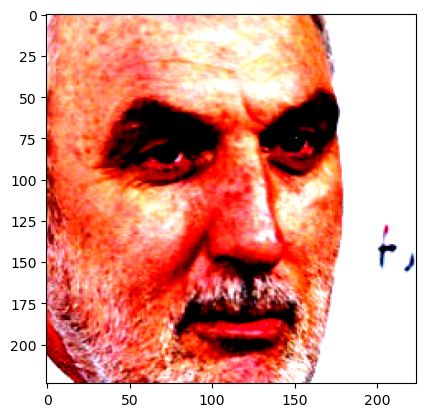

In [24]:
image_transformed2 = image_transform(np.array(image2))
image_denormalize2 = denormalize(torch.clone(image_transformed2))
plt.imshow(image_transformed2.permute(1, 2, 0))

In [25]:
dummy2 = image_transformed2[None, :, :, :]
print(dummy2.shape)
print(dummy2)

torch.Size([1, 3, 224, 224])
tensor([[[[1.0673, 1.2214, 1.2899,  ..., 2.0605, 2.0605, 2.0605],
          [1.1529, 1.2899, 1.2899,  ..., 2.0605, 2.0605, 2.0605],
          [1.2043, 1.2385, 1.1700,  ..., 2.0605, 2.0605, 2.0605],
          ...,
          [2.0434, 2.0434, 2.0605,  ..., 1.9064, 1.9064, 1.9064],
          [2.0263, 2.0605, 2.0777,  ..., 1.9064, 1.9064, 1.9064],
          [2.0092, 2.0605, 2.0777,  ..., 1.9064, 1.9064, 1.9064]],

         [[0.8880, 1.0105, 1.0105,  ..., 2.2185, 2.2185, 2.2185],
          [1.0630, 1.0980, 1.0105,  ..., 2.2185, 2.2185, 2.2185],
          [1.1506, 1.0630, 0.9230,  ..., 2.2185, 2.2185, 2.2185],
          ...,
          [2.1660, 2.1835, 2.2185,  ..., 2.0959, 2.0959, 2.0959],
          [2.1310, 2.1660, 2.2185,  ..., 2.0959, 2.0959, 2.0959],
          [2.1134, 2.1660, 2.2185,  ..., 2.0959, 2.0959, 2.0959]],

         [[0.9842, 1.1062, 1.0888,  ..., 2.5354, 2.5354, 2.5354],
          [1.1237, 1.1934, 1.0888,  ..., 2.5354, 2.5354, 2.5354],
          [1.

In [26]:
keypoint2 = model(dummy2)
keypoint2 = torch.squeeze(keypoint2)
print(keypoint2)
print(keypoint2.shape)

tensor([[-0.5529, -0.0862],
        [-0.5426,  0.0476],
        [-0.5252,  0.1734],
        [-0.4863,  0.2932],
        [-0.4088,  0.4019],
        [-0.3029,  0.4849],
        [-0.1889,  0.5503],
        [-0.0667,  0.5964],
        [ 0.0541,  0.6054],
        [ 0.1533,  0.5713],
        [ 0.2124,  0.4888],
        [ 0.2581,  0.3917],
        [ 0.2921,  0.2928],
        [ 0.3065,  0.1912],
        [ 0.3161,  0.0833],
        [ 0.3242, -0.0167],
        [ 0.3076, -0.1132],
        [-0.3489, -0.1669],
        [-0.2846, -0.2311],
        [-0.1995, -0.2570],
        [-0.1087, -0.2448],
        [-0.0208, -0.2160],
        [ 0.0967, -0.2263],
        [ 0.1494, -0.2637],
        [ 0.2076, -0.2853],
        [ 0.2637, -0.2790],
        [ 0.2922, -0.2278],
        [ 0.0506, -0.1327],
        [ 0.0672, -0.0464],
        [ 0.0857,  0.0378],
        [ 0.1106,  0.1250],
        [-0.0325,  0.1638],
        [ 0.0223,  0.1831],
        [ 0.0794,  0.2015],
        [ 0.1228,  0.1803],
        [ 0.1598,  0

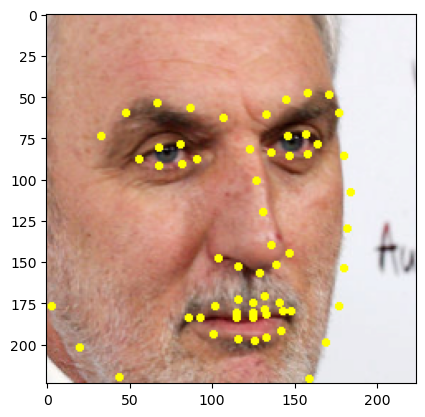

In [27]:
image_with_keypoints2 = draw_image_with_keypoints(
    image = T.ToPILImage()((image_denormalize2 * 255).type(torch.uint8)),
    keypoints = keypoint2,
    width = image_denormalize2.shape[2],
    height = image_denormalize2.shape[1],
    normalize = True
)
plt.imshow(image_with_keypoints2)

In [28]:
image2_array = np.array(image2)
print(image2_array.shape)

(259, 259, 3)


In [29]:
image2_tensor = T.ToTensor()(image2)
print(image2_tensor.shape)

torch.Size([3, 259, 259])


In [30]:
print(torch.max(image2_tensor))

tensor(1.)


tensor(255.)


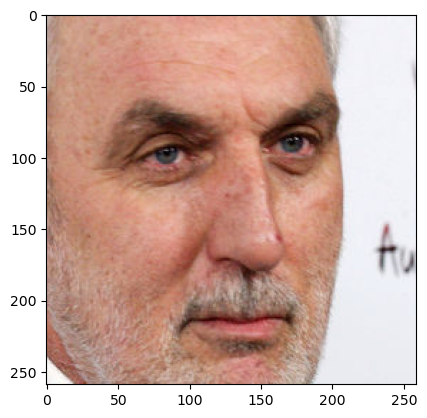

In [31]:
image2_tensor1 = image2_tensor * 255
print(torch.max(image2_tensor1))
plt.imshow(image2_tensor1.permute(1, 2, 0).type(torch.uint8))

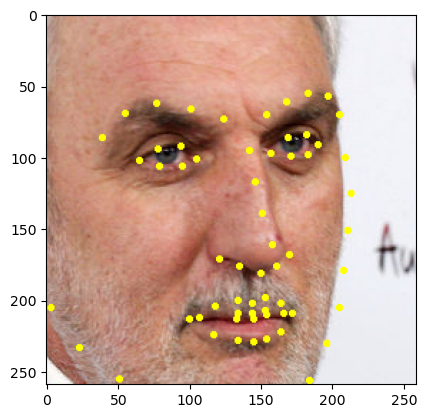

In [67]:
keypoint2_denormalize = (keypoint2 + 0.5) * torch.Tensor([image2_tensor.shape[2], image2_tensor.shape[1]])
image_with_keypoints2denormalize = draw_image_with_keypoints(
    image = T.ToPILImage()(image2_tensor),
    keypoints = keypoint2_denormalize,
    width = image2_tensor.shape[2],
    height = image2_tensor.shape[1],
    normalize = False
)
plt.imshow(image_with_keypoints2denormalize)

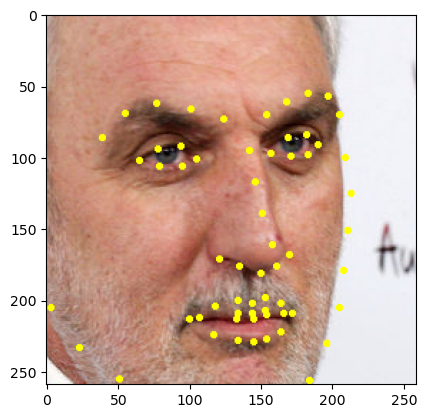

In [68]:
image_with_keypoints2normalize = draw_image_with_keypoints(
    image = T.ToPILImage()(image2_tensor),
    keypoints = keypoint2,
    width = image2_tensor.shape[2],
    height = image2_tensor.shape[1],
    normalize = True
)
plt.imshow(image_with_keypoints2normalize)

(1280, 523)


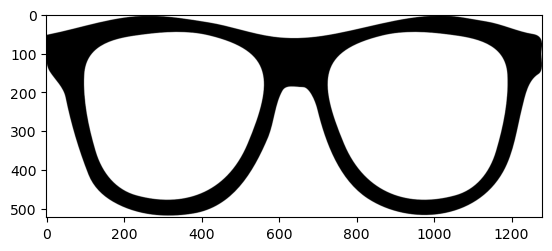

In [5]:
glasses = Image.open('./ibug_300W_large_face_landmark_dataset/eye_glasses.png')
print(glasses.size)
plt.imshow(glasses)

In [20]:
glasses_array = np.array(glasses)
print(glasses_array.shape)
print(glasses_array.dtype)
print(np.max(glasses_array))
print(np.unique(glasses_array))

(523, 1280, 4)
uint8
255
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 2

In [7]:
glasses_tensor = T.ToTensor()(glasses_array)
print(glasses_tensor.shape)
print(glasses_tensor.dtype)
print(torch.max(glasses_tensor))

torch.Size([4, 523, 1280])
torch.float32
tensor(1.)


In [10]:
glasses_albumentations = albumentations.pytorch.ToTensorV2()(image = glasses_array)['image']
print(glasses_albumentations.shape)
print(torch.max(glasses_albumentations))

torch.Size([4, 523, 1280])
tensor(255, dtype=torch.uint8)


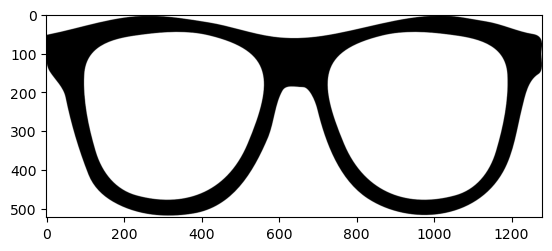

In [109]:
image_recover = T.ToPILImage()(glasses_albumentations)
plt.imshow(image_recover)

tensor(255, dtype=torch.uint8)
torch.Size([4, 1275, 1276])


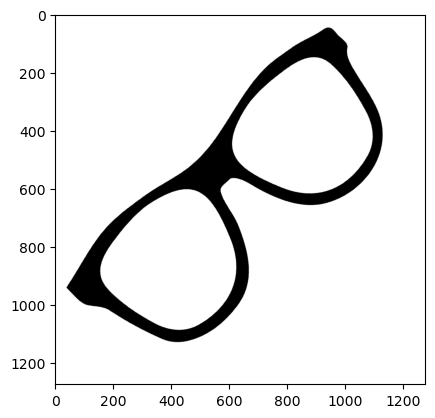

In [30]:
glasses_albumentations_rotated = T.functional.rotate(glasses_albumentations, 45, expand = True)
print(torch.max(glasses_albumentations_rotated))
print(glasses_albumentations_rotated.shape)
plt.imshow(glasses_albumentations_rotated.permute(1, 2, 0))

(1275, 1276, 4)
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 24

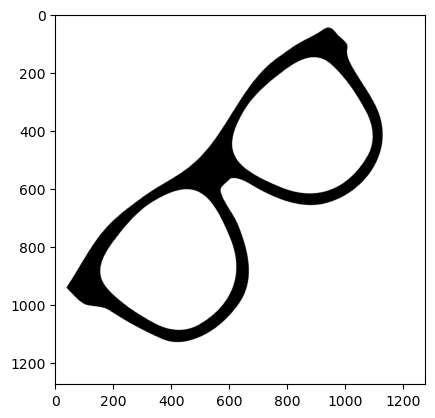

In [27]:
glasses_rotated = glasses.rotate(angle = 45, expand = True)
glasses_rotated_numpy = np.array(glasses_rotated)
print(glasses_rotated_numpy.shape)
print(np.unique(glasses_rotated_numpy[:, :, 3]))
print(glasses_rotated.size)
plt.imshow(glasses_rotated)

In [69]:
glasses_ratio = glasses_tensor.shape[1] / glasses_tensor.shape[2]

In [70]:
print(glasses_tensor[3, :, :])
print(torch.max(glasses_tensor[2, :, :]))

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor(0.)


In [71]:
left_eye_end = keypoint2_denormalize[36]
left_eye_start = keypoint2_denormalize[39]

right_eye_end = keypoint2_denormalize[45]
right_eye_start = keypoint2_denormalize[42]

top_nose = keypoint2_denormalize[27]

top_eye = keypoint2_denormalize[44]
bottom_eye = keypoint2_denormalize[41]

important_point = torch.stack([
    left_eye_end, left_eye_start, right_eye_end, right_eye_start, top_eye, bottom_eye, top_nose])
print(important_point.shape)


torch.Size([7, 2])


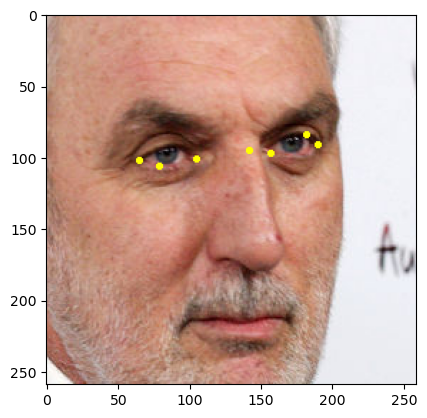

In [72]:
important_point_image = draw_image_with_keypoints(
    image = T.ToPILImage()(image2_tensor),
    keypoints = important_point,
    width = image2_tensor.shape[2],
    height = image2_tensor.shape[1],
    normalize = False
)
plt.imshow(important_point_image)

In [93]:
image2_tensor2 = albumentations.pytorch.ToTensorV2()(image = np.array(image2))['image']
print(image2_tensor2.shape)
print(torch.max(image2_tensor2))


torch.Size([3, 259, 259])
tensor(255, dtype=torch.uint8)


187 77
torch.Size([4, 77, 187])


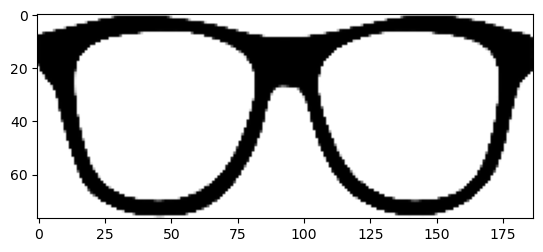

In [147]:
width_glasses = int(torch.abs((right_eye_end[0] - left_eye_end[0]) * 1.5))
#height_glasses = (torch.abs((top_eye[1] - bottom_eye[1]) * 2).type(torch.uint8))
height_glasses = int(width_glasses * glasses_ratio)

if width_glasses % 2 == 0:
    width_glasses += 1
if height_glasses % 2 == 0:
    height_glasses += 1

print(width_glasses, height_glasses)


glasses_tensor_resize = T.Resize(size = (height_glasses, width_glasses))(glasses_tensor)
print(glasses_tensor_resize.shape)
plt.imshow(glasses_tensor_resize.permute(1, 2, 0))


torch.Size([4, 76, 187])
5.069971084594727
193 94


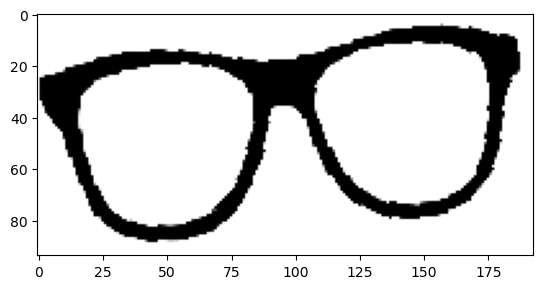

In [105]:
width_glasses = int(torch.sqrt((right_eye_end[0] - left_eye_end[0]) * (right_eye_end[0] - left_eye_end[0]) + (right_eye_end[1] - left_eye_end[1]) * (right_eye_end[1] - left_eye_end[1])) * 1.5)
#height_glasses = (torch.abs((top_eye[1] - bottom_eye[1]) * 2).type(torch.uint8))
height_glasses = int(width_glasses * glasses_ratio)

glasses_tensor_resize = T.Resize(size = (height_glasses, width_glasses))(glasses_tensor)
print(glasses_tensor_resize.shape)

angle = float(torch.rad2deg(torch.atan((left_eye_end[1] - right_eye_end[1]) / (right_eye_end[0] - left_eye_end[0]))))
print(angle)
glasses_tensor_resize = T.functional.rotate(glasses_tensor_resize, angle, expand = True)

_, height_glasses, width_glasses = glasses_tensor_resize.shape

print(width_glasses, height_glasses)
plt.imshow(glasses_tensor_resize.permute(1, 2, 0))


In [106]:
glasses_x = int(top_nose[0]) - int((width_glasses - 1) / 2)
glasses_y = int(top_nose[1]) - int((height_glasses - 1) / 2)
if width_glasses % 2 == 0:
    if right_eye_end[0] - left_eye_end[0] >= 2 * top_nose[0]:
        glasses_x = int(top_nose[0]) - int((width_glasses - 2) / 2)
    else:
        glasses_x = int(top_nose[0]) - int(width_glasses / 2)
if height_glasses % 2 == 0:
    if bottom_eye[1] - top_eye[1] >= 2 * top_nose[1]:
        glasses_y = int(top_nose[1]) - int((height_glasses - 2) / 2)
    else:
        glasses_y = int(top_nose[1]) - int(height_glasses / 2)

if glasses_x < 0:
    glasses_tensor_resize = glasses_tensor_resize[:, :, -glasses_x:]
    width_glasses += glasses_x
    glasses_x = 0
if glasses_y < 0:
    glasses_tensor_resize = glasses_tensor_resize[:, -glasses_y:, :]
    height_glasses += glasses_y
    glasses_y = 0
if glasses_x + width_glasses > image2_tensor.shape[2]:
    width_glasses -= (glasses_x + width_glasses - image2_tensor.shape[2])
    glasses_tensor_resize = glasses_tensor_resize[:, :, 0: width_glasses]
if glasses_y + height_glasses > image2_tensor.shape[1]:
    height_glasses -= (glasses_y + height_glasses - image2_tensor.shape[1])
    glasses_tensor_resize = glasses_tensor_resize[:, 0: height_glasses, :]

torch.Size([3, 94, 193]) torch.Size([94, 193])


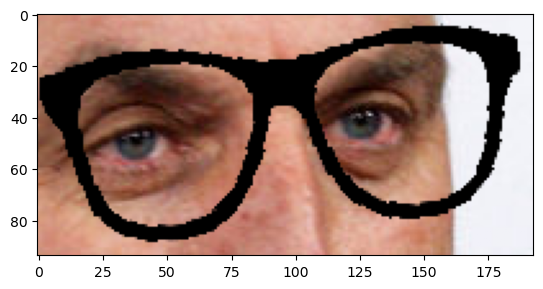

In [107]:
local = image2_tensor[:, glasses_y: glasses_y + height_glasses, glasses_x: glasses_x + width_glasses]
weight = glasses_tensor_resize[3, :, :]
print(local.shape, weight.shape)

for channel in range(3):
    local[channel, :, :] = (1 - weight) * local[channel, :, :] + weight * glasses_tensor_resize[channel, :, :]
plt.imshow(local.permute(1, 2, 0))

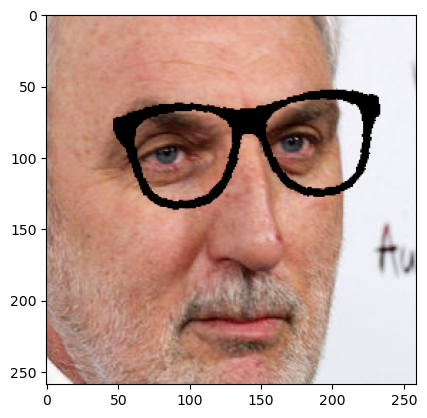

In [108]:
image2_tensor[:, glasses_y: glasses_y + height_glasses, glasses_x: glasses_x + width_glasses] = local
plt.imshow(image2_tensor.permute(1, 2, 0))

In [115]:
image2_tensor = T.ToTensor()(image2)

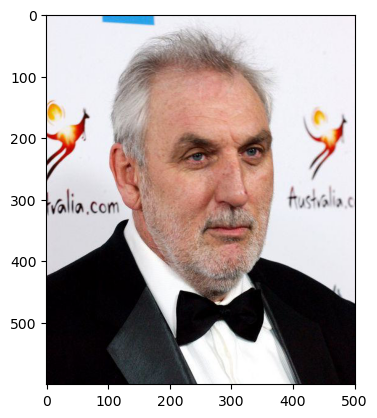

In [32]:
image_face = Image.open('./ibug_300W_large_face_landmark_dataset/face.jpg')
face_array = np.array(image_face)
plt.imshow(face_array)

In [33]:
face = fc.face_locations(face_array)
print(len(face))

1


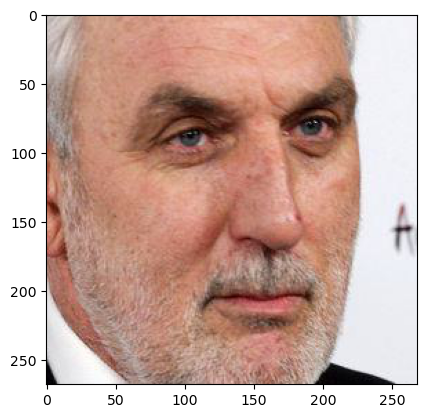

In [34]:
top, right, bottom, left = face[0]
face_location = face_array[top: bottom + 1, left: right + 1, :]
plt.imshow(face_location)

In [35]:
image_face_tensor = T.ToTensor()(face_array)
face_tensor = T.ToTensor()(face_location)

In [36]:
keypoint_face = torch.squeeze(model(image_transform(face_location)[None, :, :, :]))
print(keypoint_face.shape)

torch.Size([68, 2])


In [37]:
keypoint_face = (keypoint_face + 0.5) * torch.Tensor([face_tensor.shape[2], face_tensor.shape[1]])

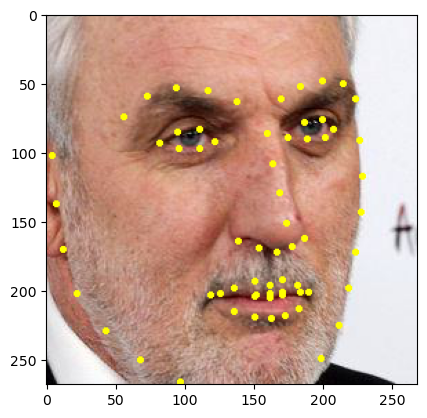

In [38]:
face_keypoint = draw_image_with_keypoints(
    image = T.ToPILImage()(face_tensor),
    keypoints = keypoint_face,
    width = face_tensor.shape[2],
    height = face_tensor.shape[1],
    normalize = False
)
plt.imshow(face_keypoint)

In [39]:
keypoint_face += torch.Tensor([left, top])

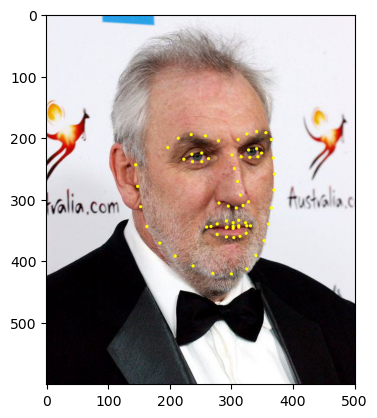

In [40]:
full_face_keypoint = draw_image_with_keypoints(
    image = T.ToPILImage()(image_face_tensor),
    keypoints = keypoint_face,
    width = image_face_tensor.shape[2],
    height = image_face_tensor.shape[1],
    normalize = False
)
plt.imshow(full_face_keypoint)

In [55]:
bottom_chin = keypoint_face[8]
top_nose = keypoint_face[27]

left_eye_end = keypoint_face[36]
right_eye_end = keypoint_face[45]

important_point2 = torch.stack([bottom_chin, top_nose, left_eye_end, right_eye_end])
print(important_point2.shape)

torch.Size([4, 2])


In [62]:
print(bottom_chin, top_nose)

tensor([300.0159, 421.1484], grad_fn=<SelectBackward0>) tensor([301.2055, 228.2894], grad_fn=<SelectBackward0>)


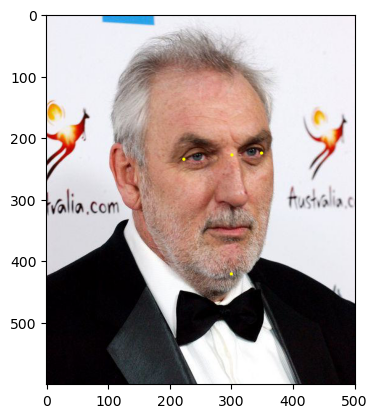

In [56]:
important_point2_image = draw_image_with_keypoints(
    image = T.ToPILImage()(image_face_tensor),
    keypoints=important_point2,
    width = image_face_tensor.shape[2],
    height = image_face_tensor.shape[1],
    normalize = False
)
plt.imshow(important_point2_image)

(170, 1140, 4) torch.Size([4, 170, 1140])
tensor(1.)


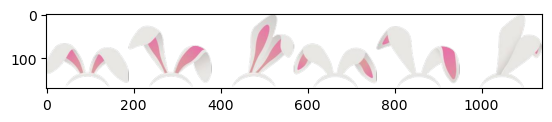

In [63]:
bunny_ear_sprite = Image.open('./ibug_300W_large_face_landmark_dataset/bunny_ear_sprite.png')
bunny_ear_sprite_array = np.array(bunny_ear_sprite)
bunny_ear_sprite_tensor = T.ToTensor()(bunny_ear_sprite_array)
print(bunny_ear_sprite_array.shape, bunny_ear_sprite_tensor.shape)
print(torch.max(bunny_ear_sprite_tensor))
plt.imshow(bunny_ear_sprite)

torch.Size([4, 170, 190])


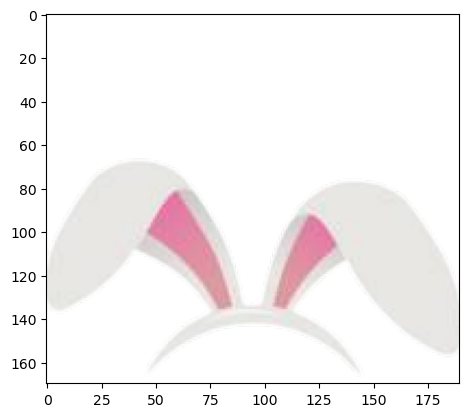

In [71]:
bunny_ear_sprite_frame1 = bunny_ear_sprite_tensor[:, :, :int(bunny_ear_sprite_tensor.shape[2] / 6)]
print(bunny_ear_sprite_frame1.shape)
plt.imshow(bunny_ear_sprite_frame1.permute(1, 2, 0))

In [72]:
bunny_ear_ratio = bunny_ear_sprite_frame1.shape[1] / bunny_ear_sprite_frame1.shape[2]
print(bunny_ear_ratio)

0.8947368421052632


torch.Size([4, 283, 317])
-0.35342031717300415
319 285


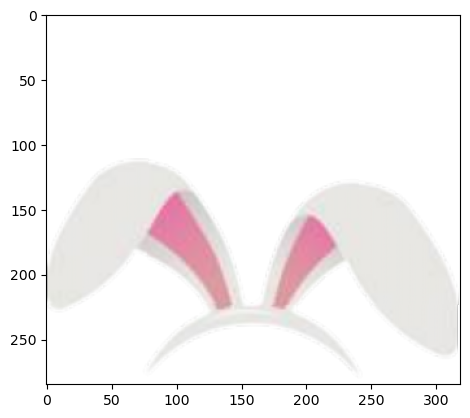

In [85]:
width_bunny_ear = int(torch.sqrt((right_eye_end[0] - left_eye_end[0]) * (right_eye_end[0] - left_eye_end[0]) + (right_eye_end[1] - left_eye_end[1]) * (right_eye_end[1] - left_eye_end[1])) * 2.5)
#height_glasses = (torch.abs((top_eye[1] - bottom_eye[1]) * 2).type(torch.uint8))
height_bunny_ear = int(width_bunny_ear * bunny_ear_ratio)

bunny_ear_frame1_resize = T.Resize(size = (height_bunny_ear, width_bunny_ear))(bunny_ear_sprite_frame1)
print(bunny_ear_frame1_resize.shape)

angle = float(torch.rad2deg(torch.atan((bottom_chin[0] - top_nose[0]) / (bottom_chin[1] - top_nose[1]))))
print(angle)
bunny_ear_frame1_resize = T.functional.rotate(bunny_ear_frame1_resize, angle, expand = True)

_, height_bunny_ear, width_bunny_ear = bunny_ear_frame1_resize.shape

print(width_bunny_ear, height_bunny_ear)
plt.imshow(bunny_ear_frame1_resize.permute(1, 2, 0))


In [89]:
distance = 0.5 * (torch.sqrt((top_nose[0] - bottom_chin[0]) * (top_nose[0] - bottom_chin[0]) + (top_nose[1] - bottom_chin[1]) * (top_nose[1] - bottom_chin[1])))

bunny_ear_x = int(top_nose[0]) - int((width_bunny_ear - 1) / 2)
bunny_ear_y = int(top_nose[1] - distance - height_bunny_ear)
if width_bunny_ear % 2 == 0:
    if right_eye_end[0] - left_eye_end[0] >= 2 * top_nose[0]:
        bunny_ear_x = int(top_nose[0]) - int((width_bunny_ear - 2) / 2)
    else:
        bunny_ear_x = int(top_nose[0]) - int(width_bunny_ear / 2)
bunny_ear_x = bunny_ear_x - int(bottom_chin[0] - top_nose[0])

if bunny_ear_x < 0:
    bunny_ear_frame1_resize = bunny_ear_frame1_resize[:, :, -bunny_ear_x:]
    width_bunny_ear += bunny_ear_x
    bunny_ear_x = 0
if bunny_ear_y < 0:
    bunny_ear_frame1_resize = bunny_ear_frame1_resize[:, -bunny_ear_y:, :]
    height_bunny_ear += bunny_ear_y
    bunny_ear_y = 0
if bunny_ear_x + width_bunny_ear > image_face_tensor.shape[2]:
    width_bunny_ear -= (bunny_ear_x + width_bunny_ear - image_face_tensor.shape[2])
    bunny_ear_frame1_resize = bunny_ear_frame1_resize[:, :, 0: width_bunny_ear]
if bunny_ear_y + height_bunny_ear > image_face_tensor.shape[1]:
    height_bunny_ear -= (bunny_ear_y + height_bunny_ear - image_face_tensor.shape[1])
    bunny_ear_frame1_resize = bunny_ear_frame1_resize[:, 0: height_bunny_ear, :]

torch.Size([3, 132, 319]) torch.Size([132, 319])


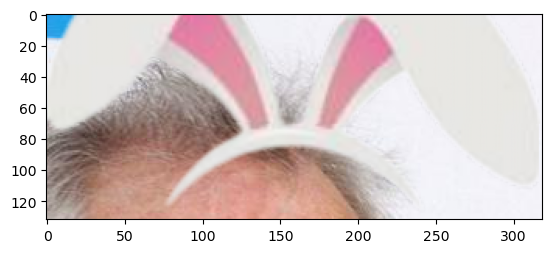

In [90]:
local_bunny_ear = torch.clone(image_face_tensor[:, bunny_ear_y: bunny_ear_y + height_bunny_ear, bunny_ear_x: bunny_ear_x + width_bunny_ear])
weight_bunny_ear = bunny_ear_frame1_resize[3, :, :]
print(local_bunny_ear.shape, weight_bunny_ear.shape)

for channel in range(3):
    local_bunny_ear[channel, :, :] = (1 - weight_bunny_ear) * local_bunny_ear[channel, :, :] + weight_bunny_ear * bunny_ear_frame1_resize[channel, :, :]
plt.imshow(local_bunny_ear.permute(1, 2, 0))

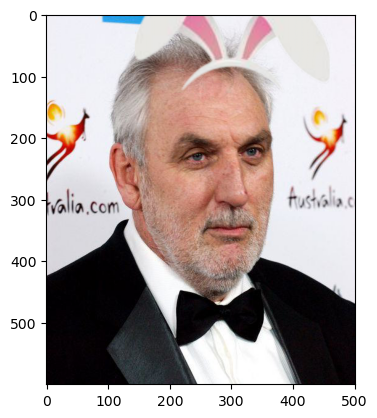

In [91]:
image_face_tensor_clone = torch.clone(image_face_tensor)
image_face_tensor_clone[:, bunny_ear_y: bunny_ear_y + height_bunny_ear, bunny_ear_x: bunny_ear_x + width_bunny_ear] = local_bunny_ear

plt.imshow(image_face_tensor_clone.permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


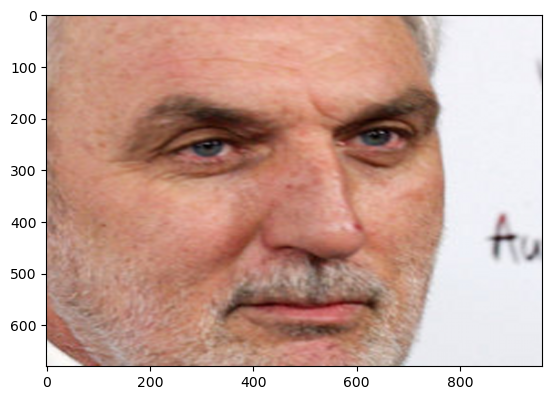

In [41]:
new_height = 680
new_width = 960

transform_resize = T.Resize(size = (new_height, new_width), interpolation= T.InterpolationMode.BICUBIC)
image_resize = transform_resize(torch.clone(image_denormalize2))
plt.imshow(image_resize.permute(1, 2, 0))

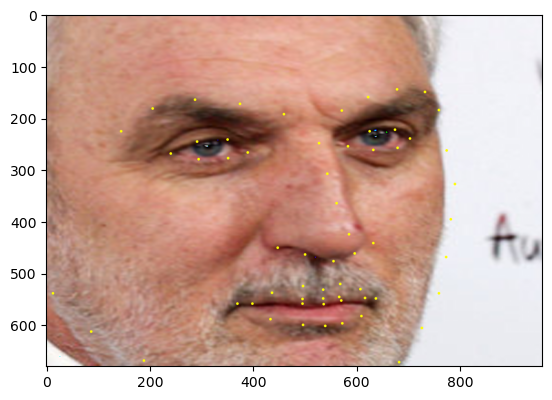

In [42]:
image_with_keypoints2resize = draw_image_with_keypoints(
    image = T.ToPILImage()((image_resize * 255).type(torch.uint8)),
    keypoints = keypoint2,
    width = image_resize.shape[2],
    height = image_resize.shape[1],
    normalize = True
)
plt.imshow(image_with_keypoints2resize)

In [42]:
model = model.cpu()

In [41]:
dml = torch_directml.device(torch_directml.default_device())
model = model.to(dml)

In [42]:
cap = cv2.VideoCapture('./face_landmark_video/videos/jacksparrow.mp4')
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

In [43]:
new_height = 480
ratio = width / height
new_width = int(ratio * new_height)
print(new_height, new_width)

480 960


In [116]:
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter('./face_landmark_video/videos/output.mp4', fourcc, 20.0, (new_width, new_height))

In [117]:
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        frame = cv2.resize(frame, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
        face_locations = fc.face_locations(frame)
        for face_location in face_locations:
            top, right, bottom, left = face_location
            width_face = right - left + 1
            height_face = bottom - top + 1

            if top - int(height_face/8) >= 0:
                top = top - int(height_face/8)
            else:
                top = 0
            if bottom + int(height_face/8) < new_height:
                bottom = bottom + int(height_face/8)
            else:
                bottom = new_height - 1
            if left - int(width_face/8) >= 0:
                left = left - int(width_face/8)
            else:
                left = 0
            if right + int(width_face/8) < new_width:
                right = right + int(width_face/8)
            else:
                right = new_width - 1
                        
            local_frame = frame[top: bottom + 1, left: right + 1].copy()

            local_transformed = image_transform(local_frame)
            keypoint = torch.squeeze(model(local_transformed[None, :, :, :].to(dml))).cpu()
            local_frame = draw_image_with_keypoints(
                image = Image.fromarray(local_frame),
                keypoints = keypoint,
                width = local_frame.shape[1],
                height = local_frame.shape[0],
                normalize = True
            )

            frame[top: bottom + 1, left: right + 1] = np.array(local_frame)

        #cv2.imshow('Frame',frame)
        #out.write(frame)

        # Press Q on keyboard to  exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
    else:
        break
#out.release()
cap.release()
cv2.destroyAllWindows()


In [55]:
def facial_landmark_video(model, input_path = None, output_path = None, new_width = None, new_height = None):
    dml = torch_directml.device(torch_directml.default_device())
    if torch.cuda.is_available():
        model = model.cuda()
    else:
        model = model.to(dml)

    if input_path is None:
        cap = cv2.VideoCapture(0)
    else:
        cap = cv2.VideoCapture(input_path)

    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    if new_height is None or new_width is None:
        new_height = height
        new_width = width
    else:
        ratio = width / height
        new_height = 480
        new_width = int(ratio * new_height)
        print(new_height, new_width)
    
    out = None
    if output_path is not None:
        fourcc = cv2.VideoWriter_fourcc(*'MP4V')
        out = cv2.VideoWriter(output_path, fourcc, 20.0, (new_width, new_height))

    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret:
            frame = cv2.resize(frame, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
            face_locations = fc.face_locations(frame)
            for face_location in face_locations:
                top, right, bottom, left = face_location
                width_face = right - left + 1
                height_face = bottom - top + 1

                # if top - int(height_face/16) >= 0:
                #     top = top - int(height_face/16)
                # else:
                #     top = 0
                # if bottom + int(height_face/16) < new_height:
                #     bottom = bottom + int(height_face/16)
                # else:
                #     bottom = new_height - 1
                # if left - int(width_face/16) >= 0:
                #     left = left - int(width_face/16)
                # else:
                #     left = 0
                # if right + int(width_face/16) < new_width:
                #     right = right + int(width_face/16)
                # else:
                #     right = new_width - 1
                            
                local_frame = frame[top: bottom + 1, left: right + 1].copy()

                local_transformed = image_transform(local_frame)
                if torch.cuda.is_available():
                    local_transformed = local_transformed.cuda()

                keypoint = torch.squeeze(model(local_transformed[None, :, :, :].to(dml))).cpu()

                local_frame = draw_image_with_keypoints(
                    image = Image.fromarray(local_frame),
                    keypoints = keypoint,
                    width = local_frame.shape[1],
                    height = local_frame.shape[0],
                    normalize = True
                )

                frame[top: bottom + 1, left: right + 1] = np.array(local_frame)

            cv2.imshow('Frame',frame)

            if out is not None:
                out.write(frame)

            # Press Q on keyboard to  exit
            if cv2.waitKey(25) & 0xFF == ord('q'):
                break
        else:
            break
        
    if out is not None:
        out.release()
    cap.release()
    cv2.destroyAllWindows()


In [56]:
facial_landmark_video(model)